<a href="https://colab.research.google.com/github/MarcelScigaj/MarcelScigaj.github.io/blob/main/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poważniejsza wprawka w języku Python plus wykresy


Import bibliotek

In [ ]:
import numpy as np
import pandas as pd

import bibliotek do 3D w matplotlib

In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

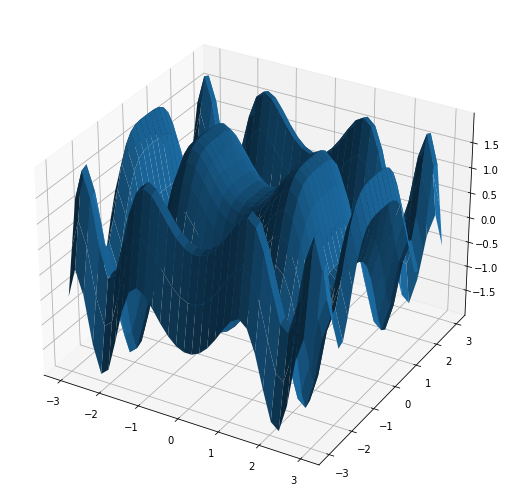

In [ ]:
# Creating dataset
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
y = x.copy().T # transpose
z = (np.sin(x **2) + np.cos(y **2) )
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(x, y, z)
 
# show plot
plt.show()

Matplotlib

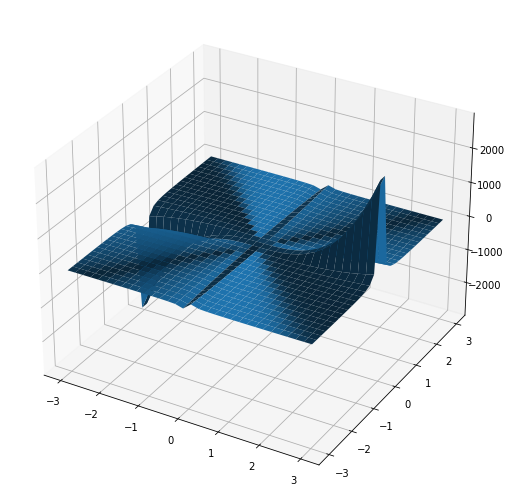

In [ ]:
 # Creating dataset
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
y = x.copy().T # transpose
#z = (np.sin(x **3) + np.cos(2*y) )
z = ((1/y**2)*(x **3)+(y **2)/x)
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(x, y, z)
 
# show plot
plt.show()

# Skale kolorów:
* [Skale kolorów (ang. *colormaps*)](https://matplotlib.org/stable/tutorials/colors/colormaps.html)  w Matplotlib
* [Skale kolorów (ang.*colorscales*)](https://plotly.com/python/builtin-colorscales/)  w Plotly 

In [ ]:
import plotly.graph_objects as go


# Define the surface:
f_surf = lambda x, y:  (x+y)/(2+np.cos(x)*np.sin(y))

# and data to instantiate the Plotly Surface:
xx = np.linspace(-2, 5, 200)
yy = np.linspace(0, 10, 300)
x,y = np.meshgrid(xx, yy)
z = f_surf(x, y)

# Inferno, Blues
fig = go.Figure(data=[go.Surface(z=f_surf(x,y), colorscale='Viridis')])

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='function surface', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

In [ ]:
# src: https://community.plotly.com/t/slicing-3d-surface-plot-along-a-user-selected-axis/40771/5
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def compose1(f, c):
    # compose a function of two variable with the constant function phi(x)=c:  f(phi(x), y) 
    g = lambda y: f(c, y)
    return g

def compose2 (f, c):
     # compose a function of two variable with the constant function phi(x)=c: f(x, phi(x))
    g = lambda x: f(x, c)
    return g

def composefh(f, h):
    # compose the function f(x,y) with y=h(x):
    g = lambda x: f(x, h(x))
    return g

def get_curve(M, v, f):
    # M a 3-list or array- represents a point in the plane of intersection: M=[x0, y0, 0]
    # v= [a, b, 0] direction contained in the plane along with w=[0,0,1]
    # f function of two variables that define the equation of the surfae z=f(x,y)
    # returns the function g that defines the equation y=g(x) of the curve of intersection
    
    x0, y0, _ =M
    a, b, _ = v 
    if a == 0 and b != 0:
        g = compose1(f, x0)
        id =1
    elif a != 0 and b==0:
        g =compose2(f, y0)
        id=2
    else:
        h = lambda x: y0+b*(x-x0)/a
        g = composefh(f, h)
        id=3
    return g, id    

# Function that returns the X, Y, Z-array defining the section plane as a Plotly surface
def get_plane(M, v,   id, xx, yy, zz):
    
    # M point contained by the plane
    # v direction included in plane (orthogonal to w=[0, 0, 1])
    # id - is the id returned by the function get_curve; the plane arrays, X, Y, Z,  are defined according to id value
    x0, y0, _= M
    a, b, _= v
  
    if id == 1:
        Y, Z = np.meshgrid(yy, zz)
        X = x0*np.ones(Y.shape)
    elif id == 2 :
        X, Z = np.meshgrid(xx, zz)
        Y = y0*np.ones(X.shape)
    elif id == 3 :
        X, Z = np.meshgrid(xx, zz)
        Y = y0+b*(X-x0)/a   
    else:
        pass
    return X, Y, Z
        

# Define the surface to be cut by a plane:
f_surf = lambda x, y:  (x+y)/(2+np.cos(x)*np.sin(y))

# and data to instantiate the Plotly Surface:
xx = np.linspace(-2, 5, 200)
yy = np.linspace(0, 10, 300)
x,y = np.meshgrid(xx, yy)
z = f_surf(x, y)
zz = np.linspace(z.min(), z.max(), 100)

# define the elements to get the section plane equation
M = [1, 2, 0]  # a point in the plane
v = [1, 2, 0] # a direction contained in the plane
g, id = get_curve(M, v, f_surf)
X, Y, Z =  get_plane(M, v,   id, xx, yy, zz)

#Define subplots of 1 row and two columns. In the subplot (1,1) draw the surface of equation z=f(x,y) and the cutting plane
#perpendicular on the plane z=0, while in (1,2) the resulted curve.

fig = make_subplots(
     rows=1, cols=2,
     horizontal_spacing=0.1,
     specs=[[{"type": "scene"}, {"type": "xy"}]])
fig.add_trace(go.Surface(x=x,
                          y=y, 
                          z=z,
                          colorscale="Viridis",
                          showscale=False), row=1, col=1)
fig.add_trace(go.Surface(x=X, y=Y, z=Z, 
                         colorscale= [[0, "rgb(254, 254, 254)"],
                                      [1, "rgb(254, 254, 254)"]],
                         showscale=False,
                         opacity =0.65), row=1, col=1)
fig.add_trace(go.Scatter(x= xx, y = g(xx), mode="lines"), row=1, col=2)    
fig.update_layout(title_text="Slicing a surface by a plane",
                  title_x=0.5,
                  scene= {"camera": {"eye": {"x": 1.65, "z":0.75}}},
                  width=900, height=500, yaxis = {"domain":  [0, 0.85]}
              )

In [ ]:

# Define the surface:
f1_surf = lambda x, y: 3*(1-x)**2*np.exp(-(x**2)-(y+1)**2)- 10*(x/5 - x**3 - y**5)*np.exp(-x**2-y**2)- 1/3*np.exp(-(x+1)**2 - y**2)


# and data to instantiate the Plotly Surface:
xx = np.linspace(-3, 3, 300)
yy = np.linspace(-3, 3, 300)
x,y = np.meshgrid(xx, yy)
z = f1_surf(x, y)

# Inferno, Blues
fig = go.Figure(data=[go.Surface(z=f1_surf(x,y), colorscale='Viridis')])

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='funkcja f1', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=600, height=600,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

In [ ]:
# Define the surface:
f2_surf = lambda x, y: y*np.sin(x)-x*np.cos(y)

# math pi
# and data to instantiate the Plotly Surface:
xx = np.linspace(-2*np.pi, 2*np.pi, 100)
yy = np.linspace(-2*np.pi, 2*np.pi, 100)
x,y = np.meshgrid(xx, yy)
z = f1_surf(x, y)

# Inferno, Blues
fig = go.Figure(data=[go.Surface(z=f1_surf(x,y), colorscale='Inferno')])

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='f2 = ysin(x)-xcos(y)', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=600, height=600,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

# Materiały uzupełniające

Zapoznaj się z nastepującymi materiałami:


*   [Gradient descent 1](https://medium.com/analytics-vidhya/visualize-the-gradient-descent-of-a-cost-function-with-its-level-circles-python-d8c850731b0a)
*  [Implementing Gradient Descent in Python](https://atmamani.github.io/projects/ml/gradient-descent-in-python/?utm_source=pocket_saves)


Animacje:
* [A Visual Explanation of Gradient Descent Methods](https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c)
* [Optimizations with Gradient Descent](http://dsdeepdive.blogspot.com/2016/03/optimizations-of-gradient-descent.html)





[Link do notatnika](shorturl.at/zBCL4)

# Zadanie do wykonania

1. Zaimplementuj metodę spadku gradientu.
2. Użyj jej do znalenienia minimum (maksimum) dla funkcji f1 lub f2
3. Uruchom kilka razy, poeksperymentuj z parametrami w celu nabrania wyczucia jak metoda działa.
4. Pokaż na wykresie, na poziomicach jak wygląda przebieg spadku w najgorszym i najlepszym wypadku (podobnie jak na ![rysunku](https://1.bp.blogspot.com/-eVq8WSmhxfE/V1K_MNMTjjI/AAAAAAAAFUo/Si6N7fkGErQO3aRitHsY_xTDyABDORU_gCLcB/s400/momentum.png])